In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Load the dataset
df = pd.read_csv('/content/Election Results 2024.csv')


In [32]:
# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
                         State  Parliamentary Constituency  \
0  Andaman and Nicobar Islands                           1   
1           Andhra Pradesh[27]                           1   
2           Andhra Pradesh[27]                           2   
3           Andhra Pradesh[27]                           3   
4           Andhra Pradesh[27]                           4   

  Parliamentary ConstituencyName Parliamentary ConstituencyType  \
0      Andaman & Nicobar Islands                            GEN   
1                          Araku                           (ST)   
2                     Srikakulam                            GEN   
3                   Vizianagaram                            GEN   
4                  Visakhapatnam                            GEN   

             WinnerCandidate WinnerParty Winner%  WinnerVotes  \
0            Bishnu Pada Ray         BJP  50.60%     102436.0   
1         Gumma Thanuja Rani       YSRCP  40.96%     477005.0  

In [33]:
# Checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
State                             0
Parliamentary Constituency        0
Parliamentary ConstituencyName    0
Parliamentary ConstituencyType    0
WinnerCandidate                   0
WinnerParty                       0
Winner%                           1
WinnerVotes                       1
Runner UpCandidate                1
Runner UpParty                    1
Runner Up%                        1
Runner UpVotes                    1
Margin_%                          1
Margin_Votes                      1
dtype: int64


In [34]:
# Dropping rows with missing values (if any)
df.dropna(inplace=True)

In [35]:
# Convert percentage columns to numeric values
df['Winner%'] = pd.to_numeric(df['Winner%'].str.rstrip('%'), errors='coerce')
df['Runner Up%'] = pd.to_numeric(df['Runner Up%'].str.rstrip('%'), errors='coerce')
df['Margin_%'] = pd.to_numeric(df['Margin_%'].str.rstrip('%'), errors='coerce')


In [36]:
# Drop rows with NaN values that may have been introduced during conversion
df.dropna(subset=['Winner%', 'Runner Up%', 'Margin_%'], inplace=True)


In [37]:
# Top winners by vote percentage
print("\nTop winners by vote percentage:")
print(df.nlargest(5, 'Winner%')[['WinnerCandidate', 'WinnerParty', 'Winner%', 'State', 'Parliamentary ConstituencyName']])



Top winners by vote percentage:
           WinnerCandidate WinnerParty  Winner%               State  \
239        Shankar Lalwani         BJP    78.54  Madhya Pradesh[40]   
129            C. R. Patil         BJP    77.05         Gujarat[31]   
231  Shivraj Singh Chouhan         BJP    76.70  Madhya Pradesh[40]   
110              Amit Shah         BJP    76.48         Gujarat[31]   
414       Biplab Kumar Deb         BJP    72.85         Tripura[53]   

    Parliamentary ConstituencyName  
239                         Indore  
129                        Navsari  
231                        Vidisha  
110                    Gandhinagar  
414                   Tripura West  


In [38]:
# Summary statistics of the dataset
print("\nSummary statistics:")
print(df.describe())



Summary statistics:
       Parliamentary Constituency     Winner%   WinnerVotes  Runner Up%  \
count                  542.000000  542.000000  5.420000e+02  542.000000   
mean                    18.167897   50.341863  6.021622e+05   36.771568   
std                     16.441108    7.680773  1.668292e+05    7.307080   
min                      1.000000   23.700000  2.572600e+04    3.310000   
25%                      6.000000   46.012500  4.996228e+05   32.075000   
50%                     14.000000   49.735000  5.867285e+05   38.095000   
75%                     25.000000   54.060000  7.159358e+05   42.437500   
max                     80.000000   78.540000  1.471885e+06   48.830000   

         Margin_%  Margin_Votes  
count  542.000000  5.420000e+02  
mean    13.564908  1.625048e+05  
std     11.305298  1.472206e+05  
min      0.010000  4.800000e+01  
25%      5.190000  5.895675e+04  
50%     10.310000  1.236855e+05  
75%     18.785000  2.229720e+05  
max     75.230000  1.175092e+06

In [39]:
# Count of unique states
print("\nNumber of unique states:")
print(df['State'].nunique())


Number of unique states:
36


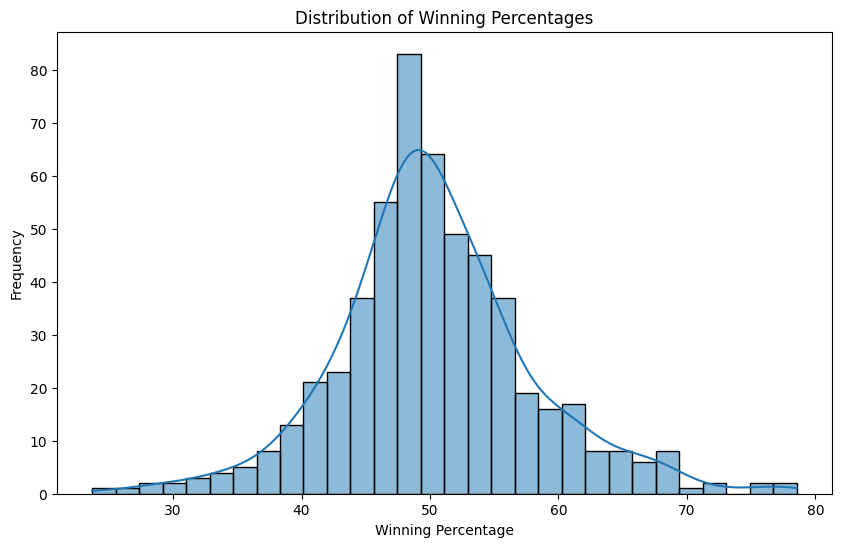

In [40]:
# Distribution of winning percentages
plt.figure(figsize=(10, 6))
sns.histplot(df['Winner%'], bins=30, kde=True)
plt.title('Distribution of Winning Percentages')
plt.xlabel('Winning Percentage')
plt.ylabel('Frequency')
plt.show()


In [41]:
# State-wise Analysis
# Number of seats won by each party in each state
state_party_wins = df.groupby(['State', 'WinnerParty']).size().unstack(fill_value=0)
print("\nNumber of seats won by each party in each state:")
print(state_party_wins)



Number of seats won by each party in each state:
WinnerParty                               AAP  AD(S)  AGP  AIMIM  AITC  AJSU  \
State                                                                          
Andaman and Nicobar Islands                 0      0    0      0     0     0   
Andhra Pradesh[27]                          0      0    0      0     0     0   
Arunachal Pradesh                           0      0    0      0     0     0   
Assam                                       0      0    1      0     0     0   
Bihar[28]                                   0      0    0      0     0     0   
Chandigarh                                  0      0    0      0     0     0   
Chhattisgarh                                0      0    0      0     0     0   
Dadra and Nagar Haveli and Daman and Diu    0      0    0      0     0     0   
Delhi[29]                                   0      0    0      0     0     0   
Goa[30]                                     0      0    0      0     0

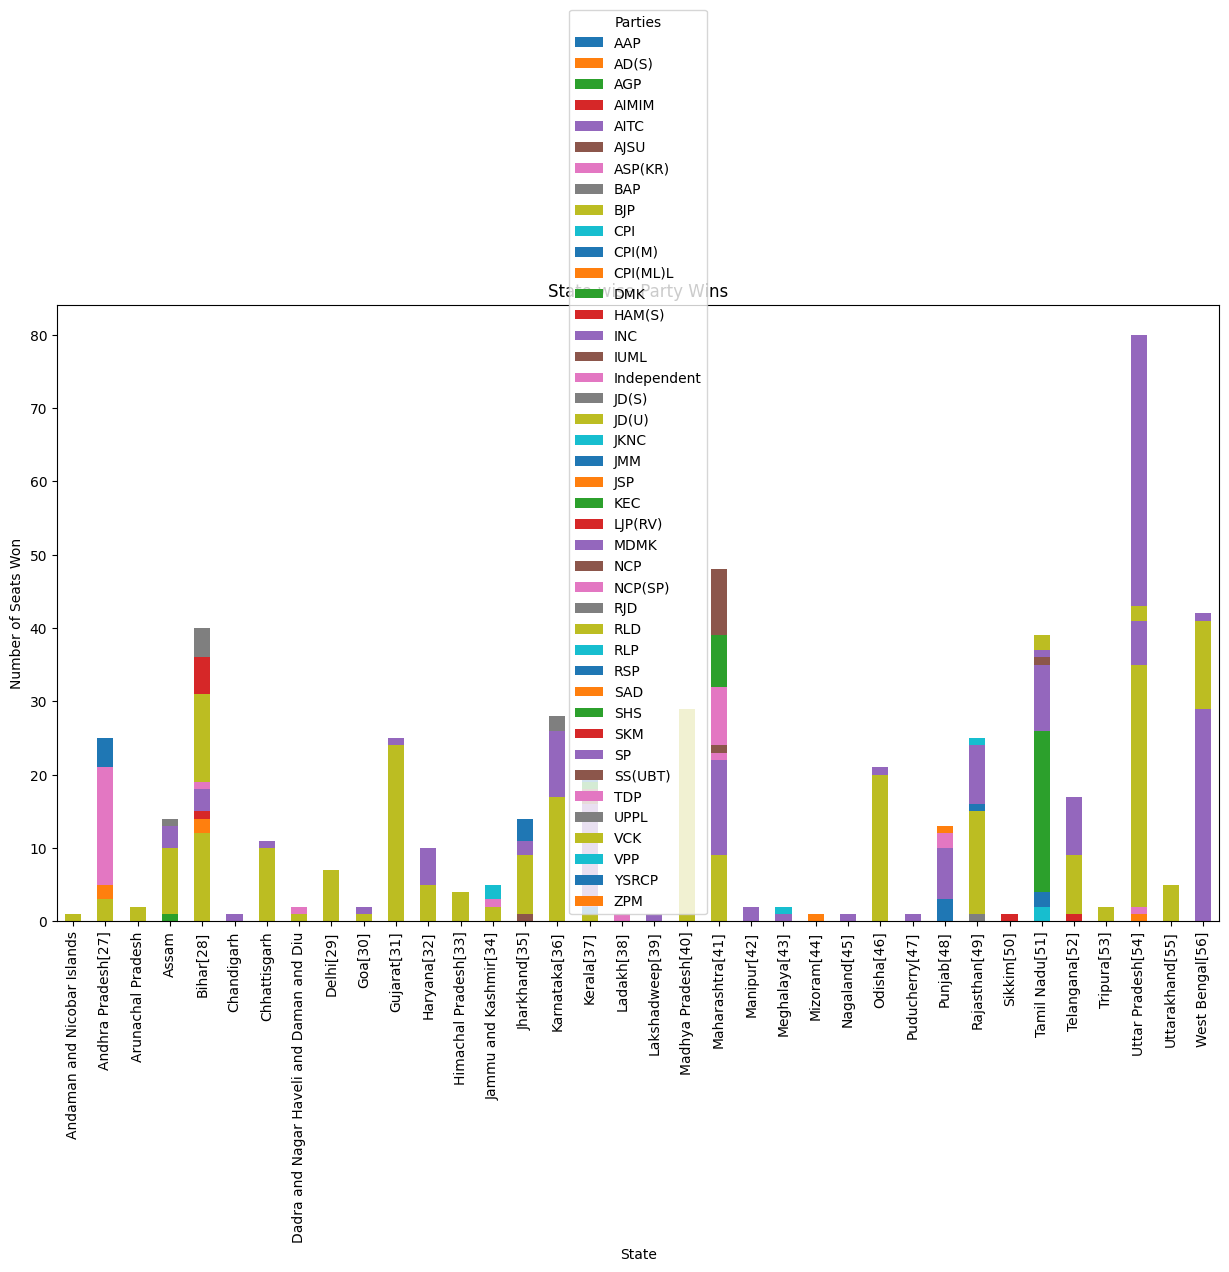

In [42]:
# Visualize state-wise party wins
state_party_wins.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('State-wise Party Wins')
plt.xlabel('State')
plt.ylabel('Number of Seats Won')
plt.legend(title='Parties')
plt.show()

In [43]:
# Total seats won by each party
party_wins = df['WinnerParty'].value_counts()
print("\nTotal seats won by each party:")
print(party_wins)


Total seats won by each party:
WinnerParty
BJP            239
INC             99
SP              37
AITC            29
DMK             22
TDP             16
JD(U)           12
SS(UBT)          9
NCP(SP)          8
SHS              7
Independent      7
LJP(RV)          5
CPI(M)           4
YSRCP            4
RJD              4
IUML             3
JMM              3
AAP              3
JD(S)            2
RLD              2
JKNC             2
JSP              2
CPI(ML)L         2
CPI              2
VCK              2
ASP(KR)          1
SKM              1
AD(S)            1
AIMIM            1
MDMK             1
AGP              1
ZPM              1
BAP              1
RLP              1
SAD              1
VPP              1
NCP              1
RSP              1
KEC              1
AJSU             1
HAM(S)           1
UPPL             1
Name: count, dtype: int64


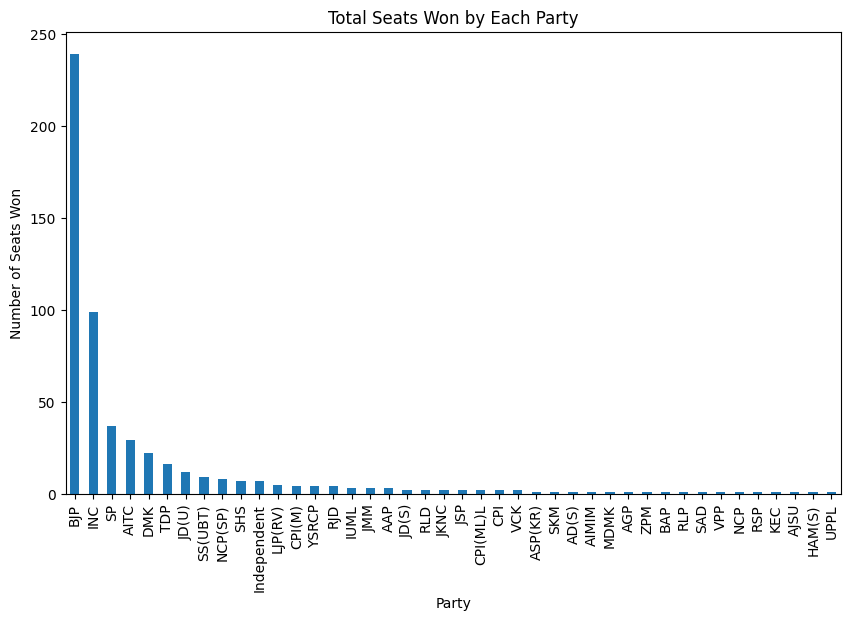

In [44]:
# Visualize total seats won by each party
party_wins.plot(kind='bar', figsize=(10, 6))
plt.title('Total Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Number of Seats Won')
plt.show()

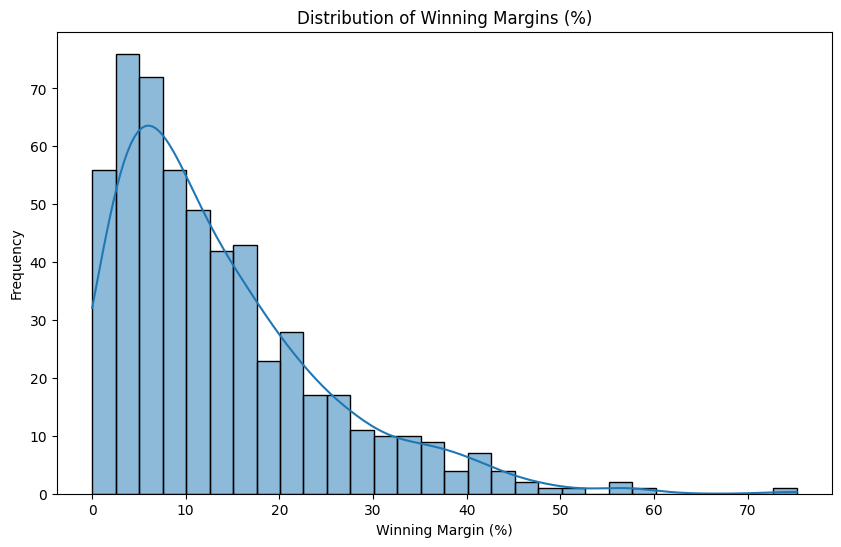

In [45]:
# Distribution of winning margins in percentage
plt.figure(figsize=(10, 6))
sns.histplot(df['Margin_%'], bins=30, kde=True)
plt.title('Distribution of Winning Margins (%)')
plt.xlabel('Winning Margin (%)')
plt.ylabel('Frequency')
plt.show()

In [46]:
# Top 5 constituencies with the highest margins
print("\nTop 5 constituencies with the highest winning margins:")
print(df.nlargest(5, 'Margin_%')[['State', 'Parliamentary ConstituencyName', 'WinnerCandidate', 'WinnerParty', 'Margin_%']])



Top 5 constituencies with the highest winning margins:
                  State Parliamentary ConstituencyName        WinnerCandidate  \
239  Madhya Pradesh[40]                         Indore        Shankar Lalwani   
129         Gujarat[31]                        Navsari            C. R. Patil   
231  Madhya Pradesh[40]                        Vidisha  Shivraj Singh Chouhan   
110         Gujarat[31]                    Gandhinagar              Amit Shah   
414         Tripura[53]                   Tripura West       Biplab Kumar Deb   

    WinnerParty  Margin_%  
239         BJP     75.23  
129         BJP     57.80  
231         BJP     56.43  
110         BJP     56.34  
414         BJP     50.55  


In [47]:
# Close contests with margin less than 1%
close_contests = df[df['Margin_%'] < 1]
print("\nClose contests with margin less than 1%:")
print(close_contests[['State', 'Parliamentary ConstituencyName', 'WinnerCandidate', 'WinnerParty', 'Margin_%', 'Margin_Votes']])



Close contests with margin less than 1%:
                 State Parliamentary ConstituencyName  \
82          Chandigarh                     Chandigarh   
93        Chhattisgarh                         Kanker   
210         Kerala[37]                       Attingal   
244    Maharashtra[41]                          Dhule   
269    Maharashtra[41]              Mumbai North West   
281    Maharashtra[41]                           Beed   
304         Odisha[46]                         Jajpur   
328         Punjab[48]                       Ferozpur   
337      Rajasthan[49]                   Jaipur Rural   
391     Tamil Nadu[51]                   Virudhunagar   
407      Telangana[52]                    Mahbubnagar   
425  Uttar Pradesh[54]                         Meerut   
444  Uttar Pradesh[54]                      Dhaurahra   
455  Uttar Pradesh[54]                    Farrukhabad   
462  Uttar Pradesh[54]                       Hamirpur   
466  Uttar Pradesh[54]                        

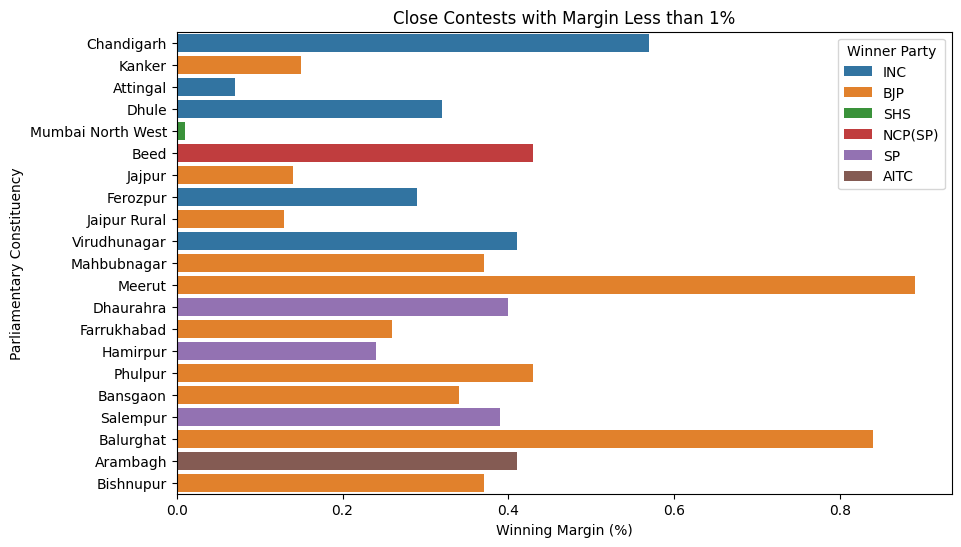

In [55]:
# Visualization of close contests
plt.figure(figsize=(10, 6))
sns.barplot(data=close_contests, x='Margin_%', y='Parliamentary ConstituencyName', hue='WinnerParty', dodge=False)
plt.title('Close Contests with Margin Less than 1%')
plt.xlabel('Winning Margin (%)')
plt.ylabel('Parliamentary Constituency')
plt.legend(title='Winner Party')
plt.show()

In [56]:
# Display the top 3 highest won parties
top_3_parties = party_wins.head(3)
print("Top 3 highest won parties:")
print(top_3_parties)

Top 3 highest won parties:
WinnerParty
BJP    239
INC     99
SP      37
Name: count, dtype: int64


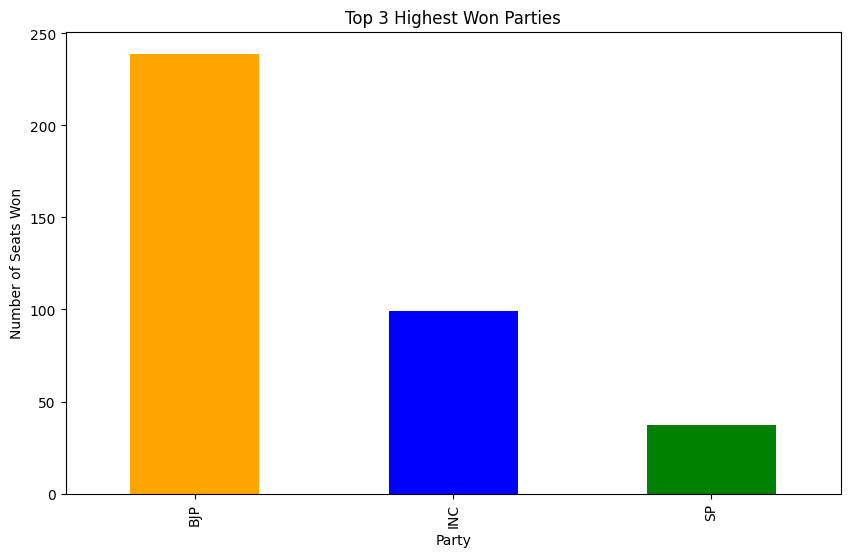

In [59]:
# Plotting the top 3 parties
plt.figure(figsize=(10, 6))
top_3_parties.plot(kind='bar', color=['orange', 'blue', 'green'])
plt.title('Top 3 Highest Won Parties')
plt.xlabel('Party')
plt.ylabel('Number of Seats Won')
plt.show()